In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
mostrecent = session.query(func.max(Measurement.date)).first()
print(mostrecent)

('2017-08-23',)


<Axes: xlabel='Date', ylabel='Inches'>

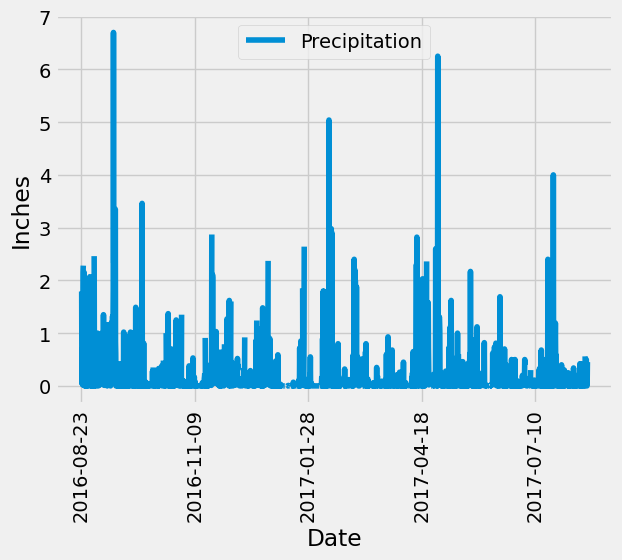

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oneYearAgo = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last12months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneYearAgo).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last12monthsDF = pd.DataFrame(last12months, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
last12monthsDF = last12monthsDF.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
last12monthsDF.plot(x="Date", y="Precipitation", xlabel="Date", ylabel="Inches", rot=90)

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
last12monthsDF.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
stationCount = session.query(func.count(Station.station)).all()
print(stationCount)

[(9,)]


In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#displaying the station name and # times it shows up in Measurement data set, grouping by station name 
#and ordering by row count from greatest to smallest (descending)

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='Temperature', ylabel='Frequency'>

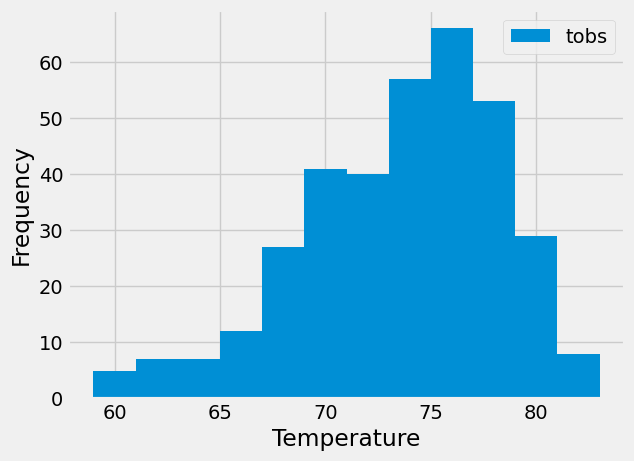

In [78]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
oneYearAgo = dt.date(2017, 8, 23) - dt.timedelta(days=365)
MostActiveLast12Months = session.query(Measurement.tobs).filter(Measurement.date >= oneYearAgo).filter(Measurement.station == 'USC00519281').all()
mostActiveLast12MonthsDF = pd.DataFrame(MostActiveLast12Months, columns=['tobs'])
mostActiveLast12MonthsDF.plot.hist(bins=12, xlabel="Temperature")

# Close Session

In [79]:
# Close Session
session.close()